This notebook is an extension of Visualizing features with tSNE. In the previous notebook, we worked with keywords and timestamps predominantly. Here, we will work with them separately to see which members are closer to which other members in terms of the topics they talked about, and which members are closer to which otehr members in terms of when they talked in the Parliament.

The studies in the previous study have been replicated, and extended in the following manner:
- Using sparsePCA instead of truncatedSVD independently, as well as in combination with tSNE.

In [62]:
import pickle
import numpy as np
from random import shuffle
import requests
import math
from datetime import datetime
import operator
from sklearn import datasets, linear_model, svm, manifold
from sklearn.decomposition import TruncatedSVD, sparse_pca
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [3]:
f = open('../Results/Pickles/member_names.pickle', 'rb')
member_names = pickle.load(f)
f.close()

In [4]:
f = open('../Results/Pickles/edge_details.pickle', 'rb')
edge_details = pickle.load(f)
f.close()

In [5]:
f = open('../Data/parties.csv', 'r')

parties = f.readlines()
parties = [p.strip() for p in parties]

f.close()

In [6]:
f = open('../Results/Pickles/member_details.pickle', 'rb')
member_details = pickle.load(f)
f.close()

In [7]:
f = open('../Results/Pickles/debate_details.pickle', 'rb')
debate_details = pickle.load(f)
f.close()

In [8]:
f = open('../Results/Pickles/strongly_significant.pickle', 'rb')
strongly_significant = pickle.load(f)
f.close()

In [9]:
f = open('../Results/Pickles/mildly_significant.pickle', 'rb')
mildly_significant = pickle.load(f)
f.close()

In [10]:
f = open('../Results/Pickles/less_significant.pickle', 'rb')
less_significant = pickle.load(f)
f.close()

In [11]:
f = open('../Results/Pickles/strong_participation_members.pickle', 'rb')
strong_participation = pickle.load(f)
f.close()

In [12]:
f = open('../Results/Pickles/medium_participation_members.pickle', 'rb')
medium_participation = pickle.load(f)
f.close()

In [13]:
f = open('../Results/Pickles/weak_participation_members.pickle', 'rb')
weak_participation = pickle.load(f)
f.close()

In [14]:
alliances = ['UPA', 'NDA', 'TF', 'Others']

party_alliance = {'INC':'UPA', 'DMK':'Others', 'J&KNC':'UPA', 'CPI(M)':'TF', 'SS':'NDA', 'AITC':'UPA', 'BJP':'NDA',\
                  'IUML':'UPA', 'AIUDF':'Others', 'SAD':'NDA', 'AIADMK':'TF', 'SP':'Others', 'RLD':'UPA', 'JMM':'NDA',\
                  'BSP':'TF', 'HJC':'NDA', 'NCP':'UPA', 'BPF':'NDA', 'NPF':'UPA', 'JD(U)':'Others', 'CPI':'TF',\
                  'JD(S)':'TF', 'MDMK':'TF', 'BVA':'Others', 'BJD':'TF', 'Ind.':'Others', 'JVM (P)':'Others',\
                  'RJD':'Others', 'AIFB':'TF', 'RSP':'TF', 'KC(M)':'UPA', 'TDP':'TF', 'AIMIM':'Others', 'SDF':'NDA',\
                  'TRS':'NDA', 'YSR Congress Party':'Others', 'SWP':'Others', 'VCK':'Others', 'AGP':'NDA'}


## Using only keywords - number of times the member participated in a debate involving that keyword, instead of a one-hot vector

In [15]:
all_keywords = set([])
all_timestamps = set([])

for debate in debate_details:
    for rec in debate_details[debate]:
        all_timestamps.add(rec[1])
        all_keywords |= rec[2]
        
all_keywords.remove('')

In [16]:
all_keywords = list(all_keywords)
all_timestamps = list(all_timestamps)

In [18]:
member_vector = [[0 for x in range(len(all_keywords))] for y in range(len(member_names))]

for debate in debate_details:
    for rec in debate_details[debate]:
        for participant in rec[0]:
            try:
                for word in rec[2]:
                    if word == '':
                        continue
                    member_vector[member_names.index(participant)][all_keywords.index(word)] += 1
            except ValueError:
                continue

## Using truncatedSVD to reduce number of dimensions to 2

In [23]:
model = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
transformed_features = model.fit_transform(member_vector)

In [24]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [25]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

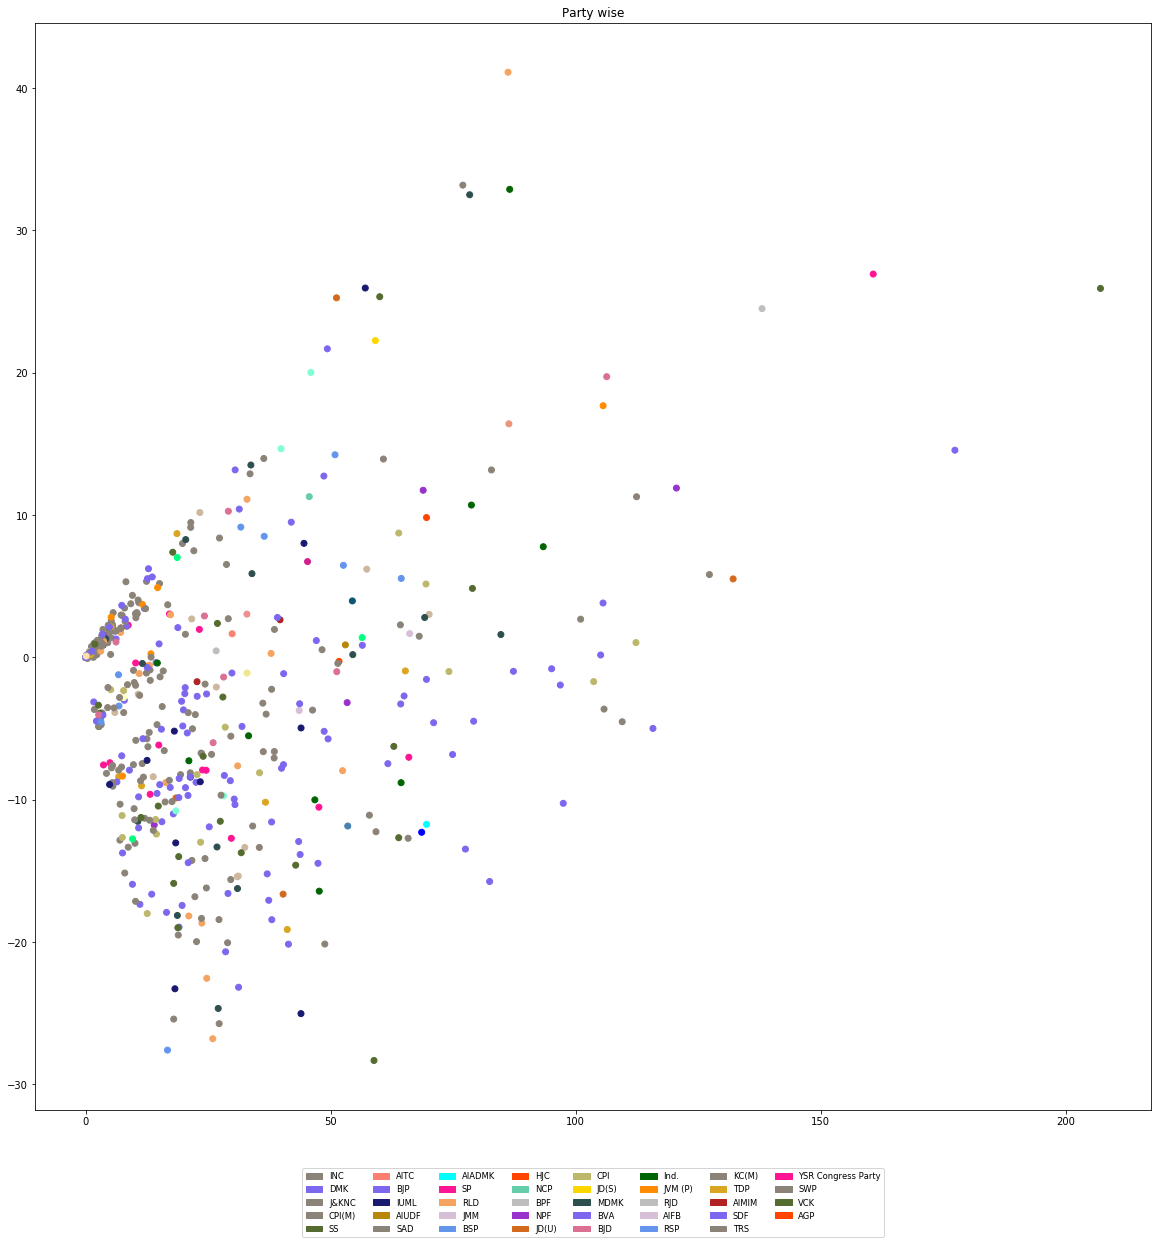

In [26]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in transformed_features], [x[1] for x in transformed_features], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Using tSNE to reduce number of dimensions to 2

In [27]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(member_vector))

In [28]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [29]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

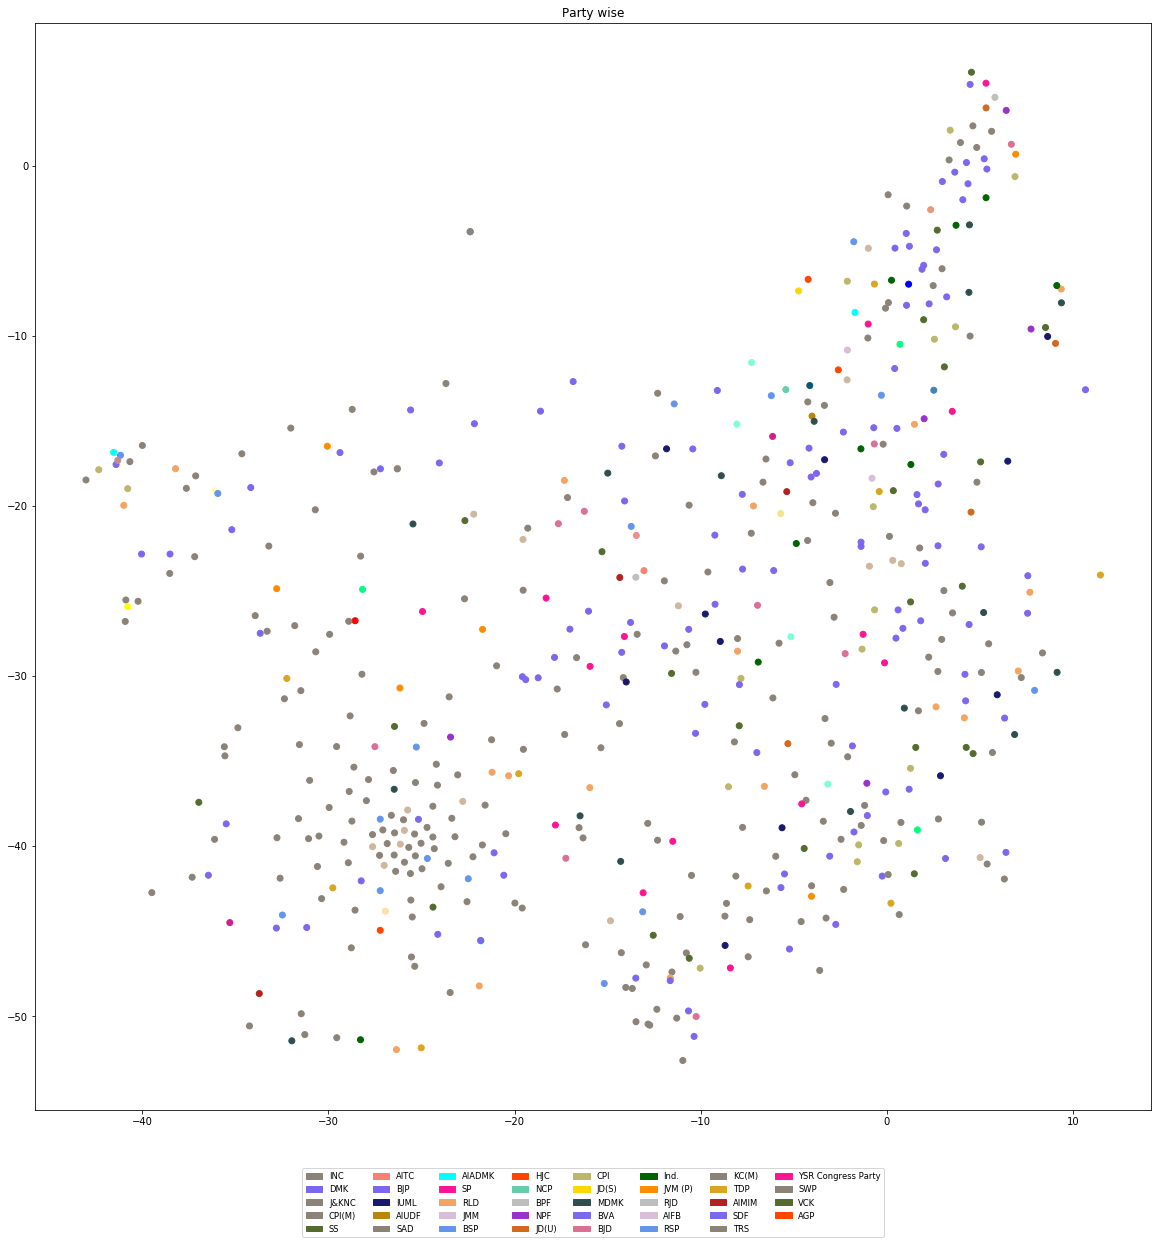

In [30]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Using truncatedSVD to reduce number of dimensions to 30 and then using tSNE to reduce the number of dimensions to 2

In [31]:
model = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
transformed_features = model.fit_transform(member_vector)

In [32]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(transformed_features))

In [33]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [34]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

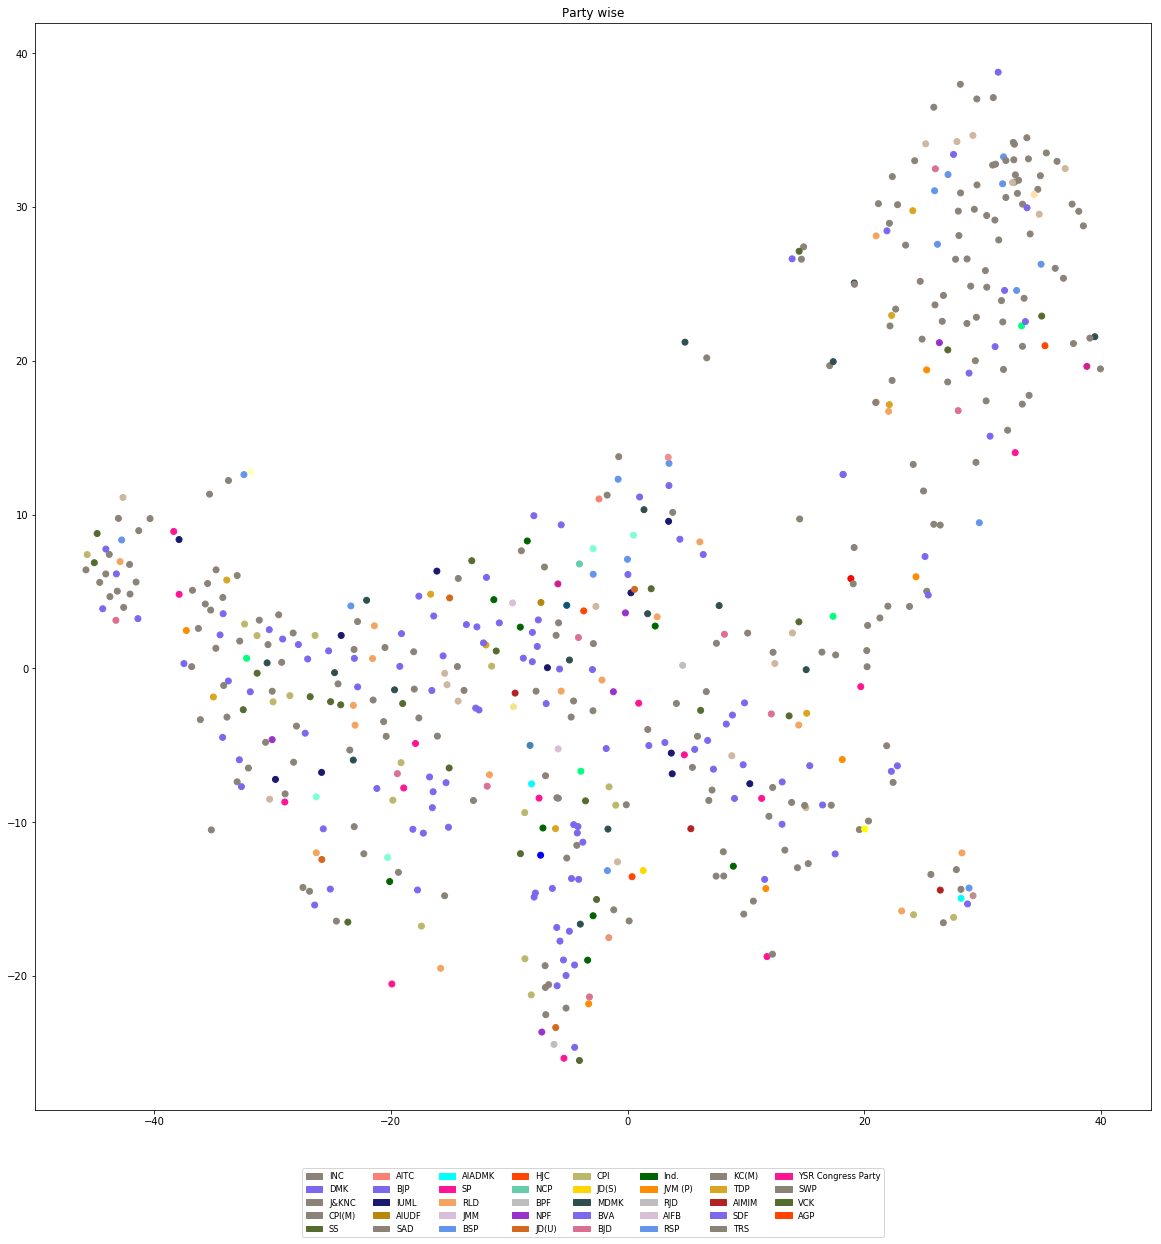

In [35]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

# Categorizing parties

1. Strongly significant participation (>= 350)
2. Mildly significant participation (>= 100 and < 350)
3. Less significant participation (< 100)

In this section, we will not use different colours for each party. Instead, we will use just 3 colours, one each for the strongly significant, mildly significant, and less significant parties.

## Using truncatedSVD to reduce number of dimensions to 2

In [36]:
model = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
transformed_features = model.fit_transform(member_vector)

In [37]:
colors = ['black', 'red', 'yellow']

member_colors = []

for i in range(len(member_names)):
    if member_details[member_names[i]][0] in strongly_significant:
        member_colors.append('black')
    elif member_details[member_names[i]][0] in mildly_significant:
        member_colors.append('red')
    else:
        member_colors.append('yellow')

In [38]:
legend_list = [mpatches.Patch(color = 'black', label = 'Strongly significant'), mpatches.Patch(color = 'red', label = 'Mildly significant'), mpatches.Patch(color = 'yellow', label = 'Less significant')]
  
fontp = FontProperties()
fontp.set_size('small')

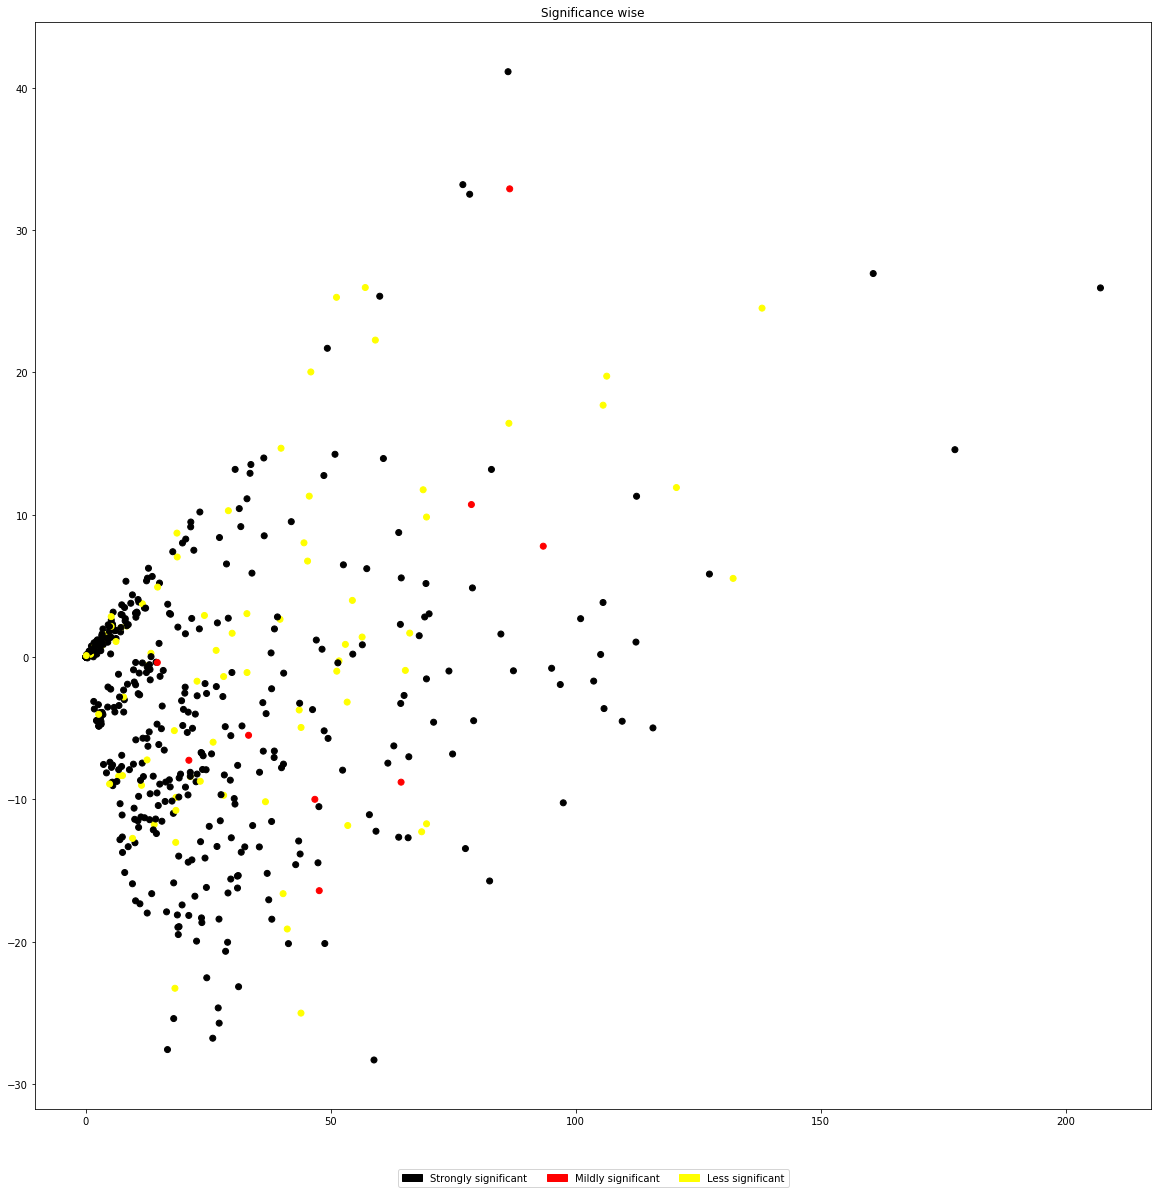

In [39]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('medium')

plt.scatter([x[0] for x in transformed_features], [x[1] for x in transformed_features], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Significance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Using tSNE to reduce number of dimensions to 2

In [40]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(member_vector))

In [41]:
colors = ['black', 'red', 'yellow']

member_colors = []

for i in range(len(member_names)):
    if member_details[member_names[i]][0] in strongly_significant:
        member_colors.append('black')
    elif member_details[member_names[i]][0] in mildly_significant:
        member_colors.append('red')
    else:
        member_colors.append('yellow')

In [42]:
legend_list = [mpatches.Patch(color = 'black', label = 'Strongly significant'), mpatches.Patch(color = 'red', label = 'Mildly significant'), mpatches.Patch(color = 'yellow', label = 'Less significant')]
  
fontp = FontProperties()
fontp.set_size('small')

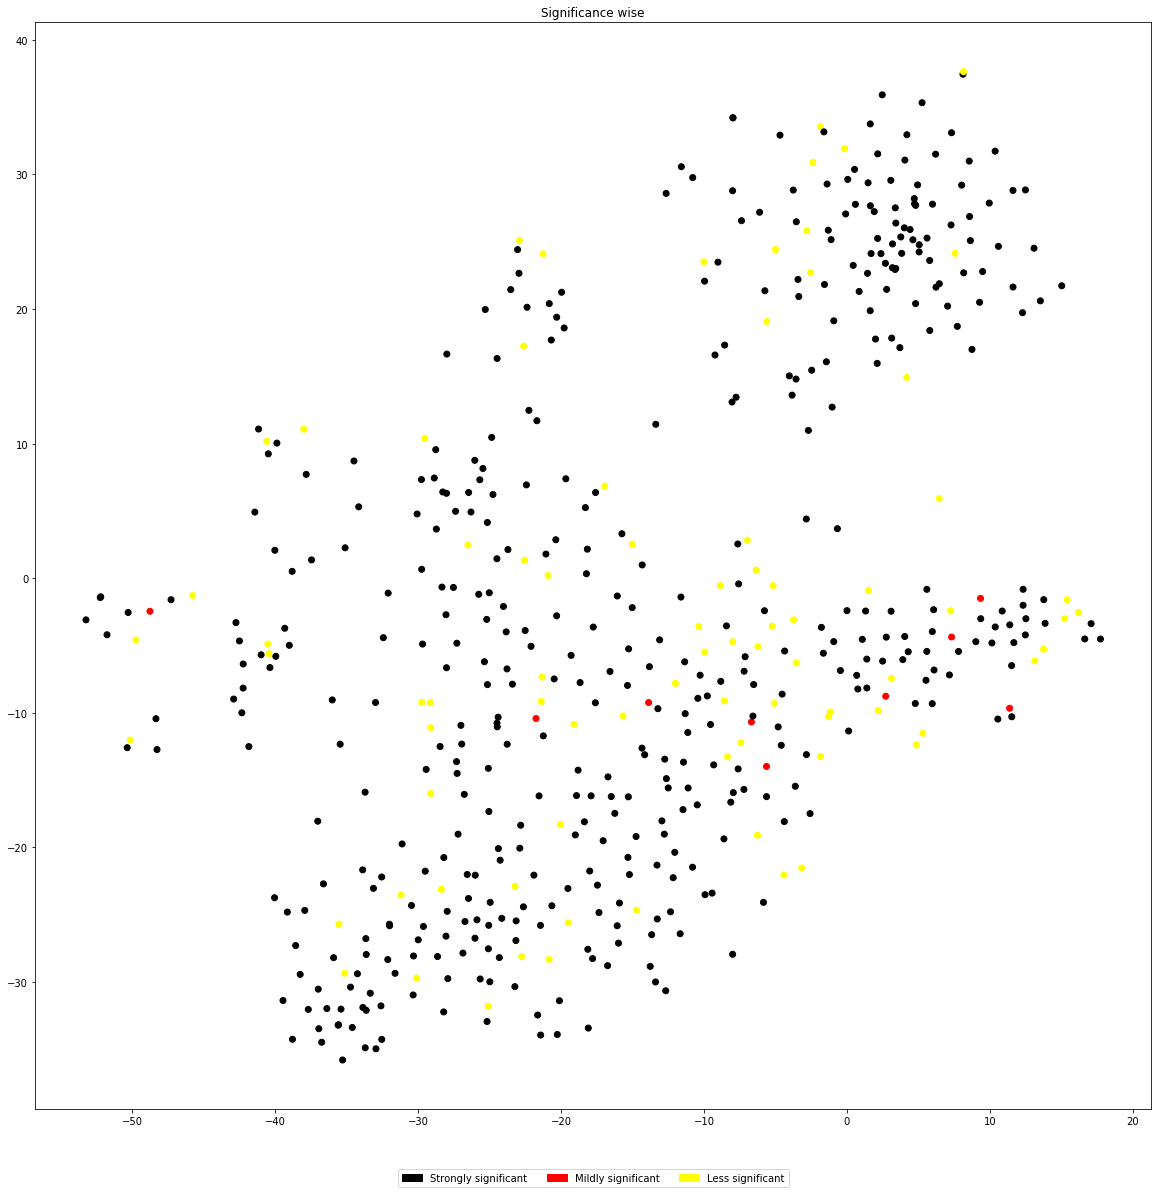

In [43]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('medium')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Significance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Using truncatedSVD to reduce number of dimensions to 30 and then using tSNE to reduce the number of dimensions to 2

In [44]:
model = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
transformed_features = model.fit_transform(member_vector)

In [45]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(transformed_features))

In [46]:
colors = ['black', 'red', 'yellow']

member_colors = []

for i in range(len(member_names)):
    if member_details[member_names[i]][0] in strongly_significant:
        member_colors.append('black')
    elif member_details[member_names[i]][0] in mildly_significant:
        member_colors.append('red')
    else:
        member_colors.append('yellow')

In [47]:
legend_list = [mpatches.Patch(color = 'black', label = 'Strongly significant'), mpatches.Patch(color = 'red', label = 'Mildly significant'), mpatches.Patch(color = 'yellow', label = 'Less significant')]
  
fontp = FontProperties()
fontp.set_size('small')

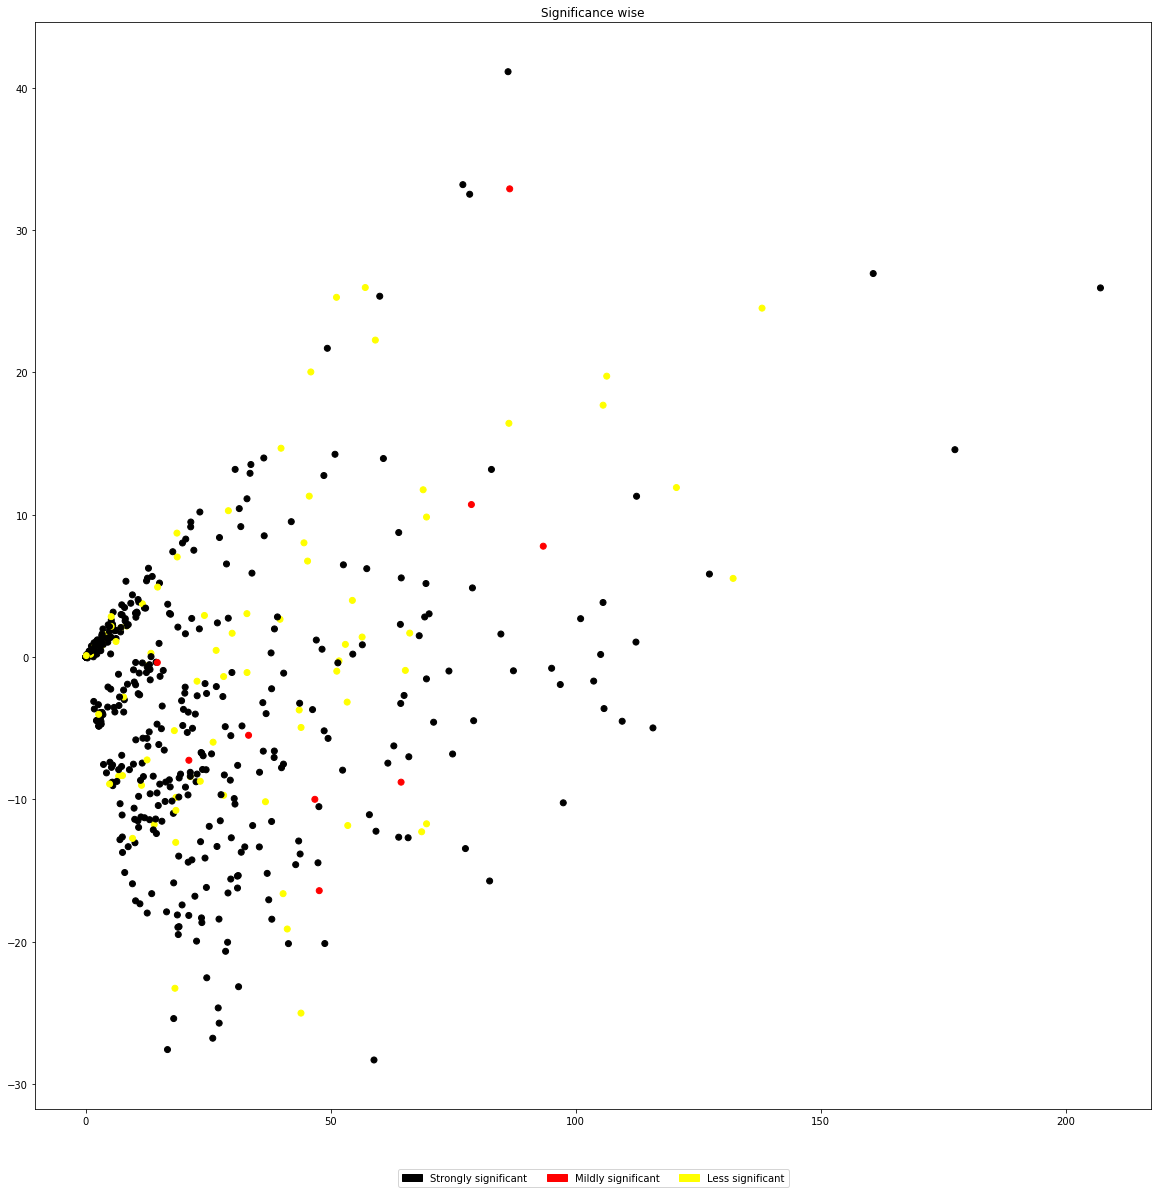

In [48]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('medium')

plt.scatter([x[0] for x in transformed_features], [x[1] for x in transformed_features], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Significance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

# Categorizing members

1. Strong participation (>= 80)
2. Medium participation (>= 25 and < 80)
3. Weak participation (< 25)

In this section, we will not represent members by their party colours or characteristics. Instead, we will use their individual interaction level to colour their nodes.

## Using truncatedSVD to reduce number of dimensions to 2

In [49]:
model = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
transformed_features = model.fit_transform(member_vector)

In [50]:
colors = ['black', 'red', 'yellow']

member_colors = []

for i in range(len(member_names)):
    if member_names[i] in strong_participation:
        member_colors.append('black')
    elif member_names[i] in medium_participation:
        member_colors.append('red')
    else:
        member_colors.append('yellow')

In [51]:
legend_list = [mpatches.Patch(color = 'black', label = 'Strong participation'), mpatches.Patch(color = 'red', label = 'Medium participation'), mpatches.Patch(color = 'yellow', label = 'Weak participation')]
  
fontp = FontProperties()
fontp.set_size('small')

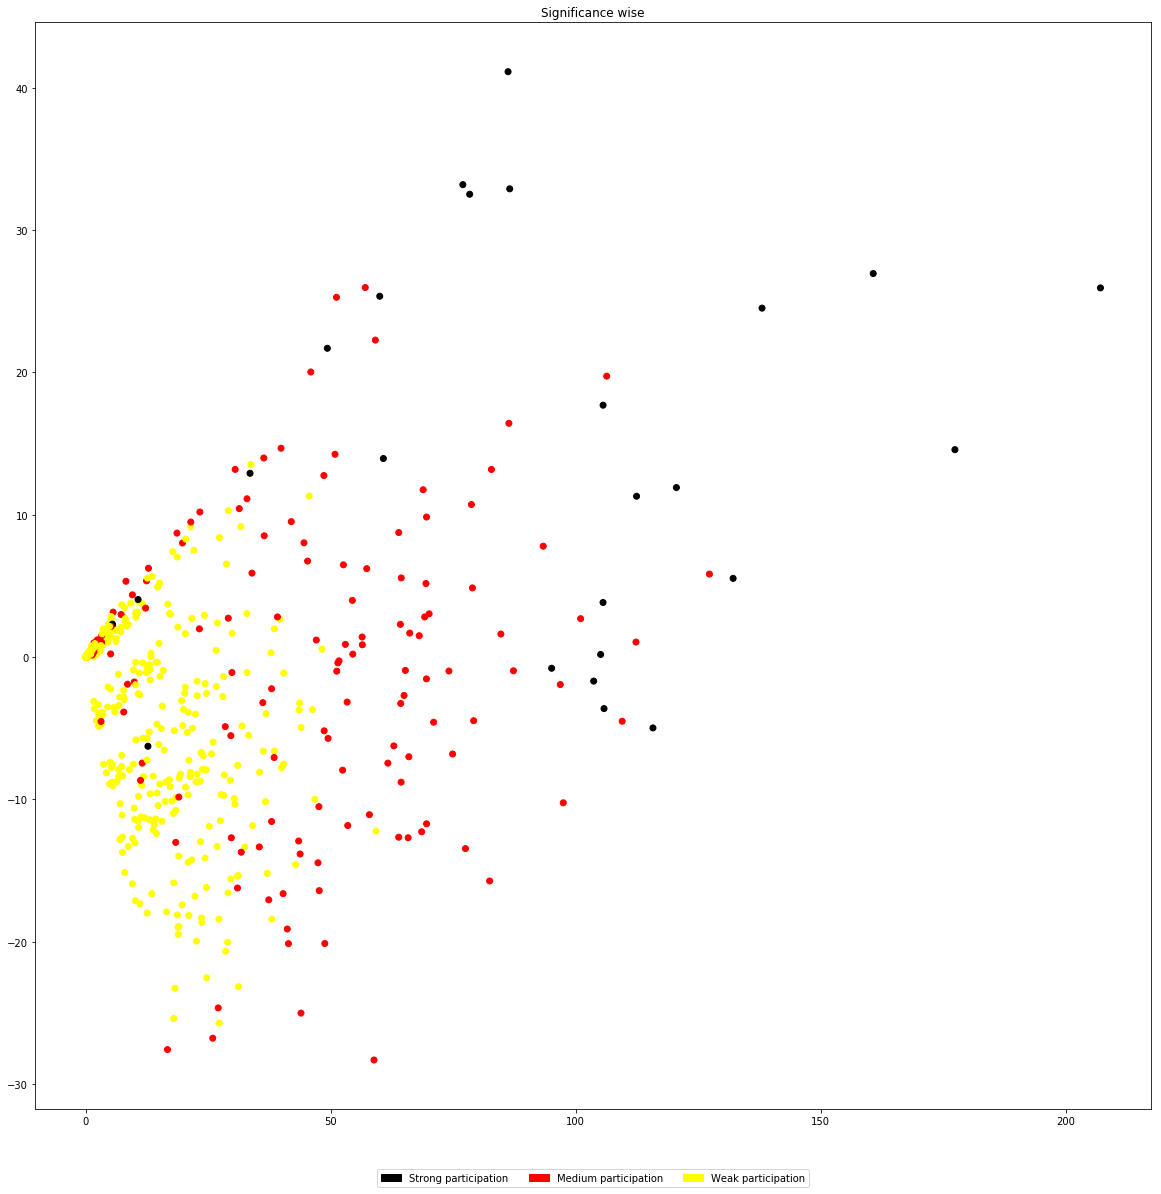

In [52]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('medium')

plt.scatter([x[0] for x in transformed_features], [x[1] for x in transformed_features], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Significance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Using tSNE to reduce number of dimensions to 2

In [53]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(member_vector))

In [54]:
colors = ['black', 'red', 'yellow']

member_colors = []

for i in range(len(member_names)):
    if member_names[i] in strong_participation:
        member_colors.append('black')
    elif member_names[i] in medium_participation:
        member_colors.append('red')
    else:
        member_colors.append('yellow')

In [55]:
legend_list = [mpatches.Patch(color = 'black', label = 'Strong participation'), mpatches.Patch(color = 'red', label = 'Medium participation'), mpatches.Patch(color = 'yellow', label = 'Weak participation')]
  
fontp = FontProperties()
fontp.set_size('small')

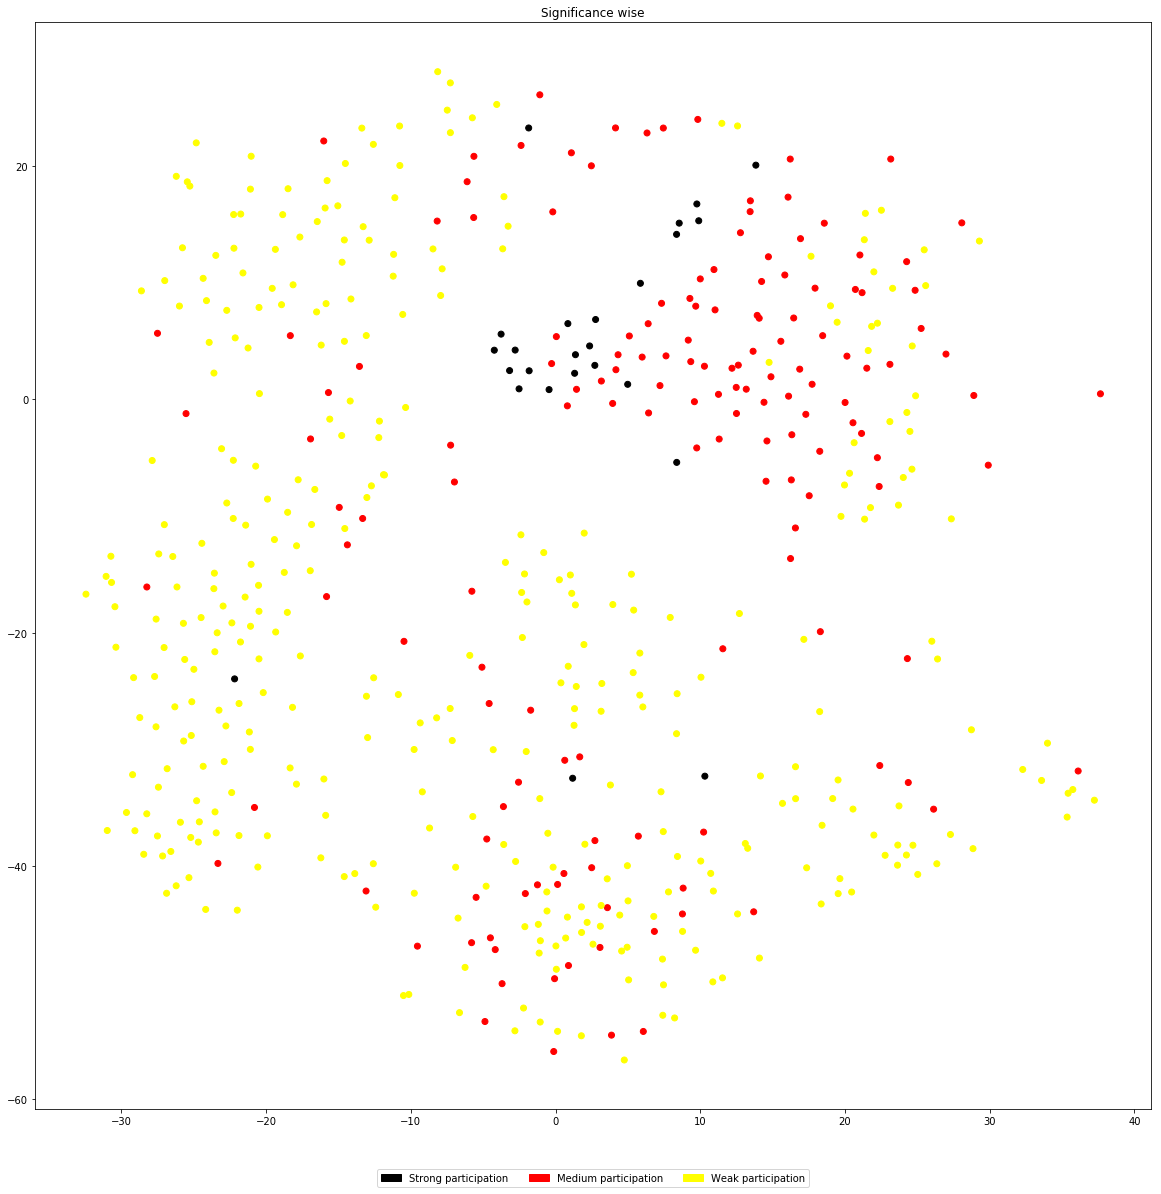

In [56]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('medium')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Significance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Using truncatedSVD to reduce number of dimensions to 30 and then using tSNE to reduce the number of dimensions to 2

In [57]:
model = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
transformed_features = model.fit_transform(member_vector)

In [58]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(transformed_features))

In [59]:
colors = ['black', 'red', 'yellow']

member_colors = []

for i in range(len(member_names)):
    if member_names[i] in strong_participation:
        member_colors.append('black')
    elif member_names[i] in medium_participation:
        member_colors.append('red')
    else:
        member_colors.append('yellow')

In [60]:
legend_list = [mpatches.Patch(color = 'black', label = 'Strong participation'), mpatches.Patch(color = 'red', label = 'Medium participation'), mpatches.Patch(color = 'yellow', label = 'Weak participation')]
  
fontp = FontProperties()
fontp.set_size('small')

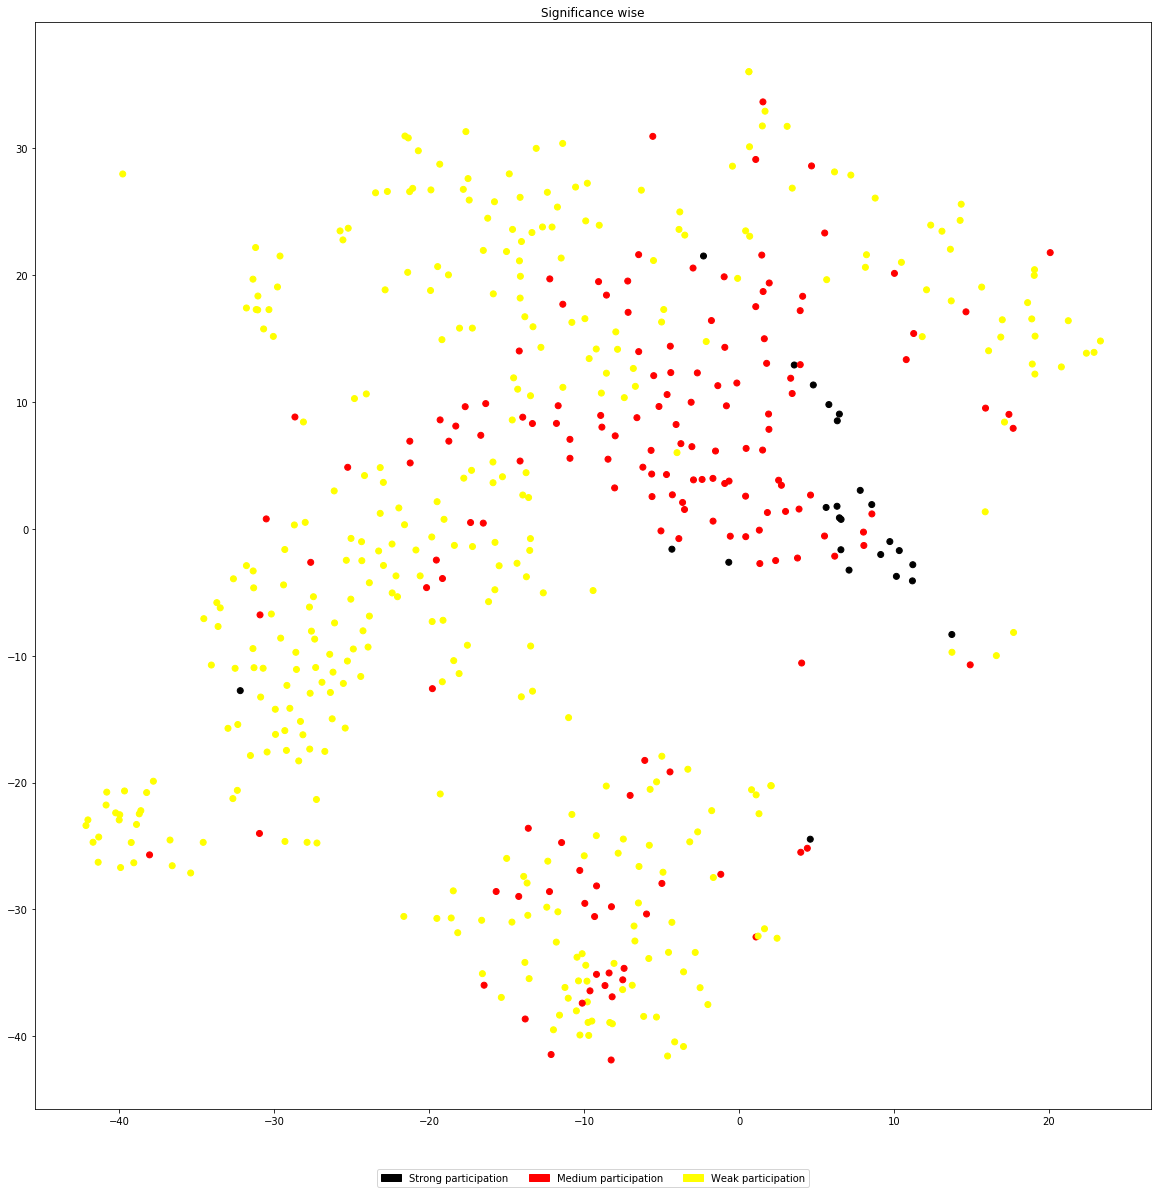

In [61]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('medium')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Significance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()